### Which MOEA is the Best ?

Algorithms to be considered
* SPEA 2
* NSGA 2
* RNSGA2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [6]:
from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())
import numpy as np
from pymoo.util.plotting import plot

Compiled Extensions:  True


In [7]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many.dtlz import DTLZ3
from pymoo.problems.many.dtlz import DTLZ4
from pymoo.problems.many.dtlz import DTLZ5
from pymoo.problems.many.dtlz import DTLZ6
from pymoo.problems.many.dtlz import DTLZ7
from pymoo.visualization.scatter import Scatter
from pymoo.optimize import minimize
from pymoo.indicators.hv import HV


In [8]:
# Hypervolume of pareto front of problem for n_vars = 2,3,5,10
problem_5 = DTLZ7(n_var=5)
original_pareto_front_2 = problem_5.pareto_front()
objective_nvar2_1 = [i[0] for i in original_pareto_front_2]
objective_nvar2_2 = [i[1] for i in original_pareto_front_2]
objective_nvar2_3 = [i[2] for i in original_pareto_front_2]
ref_vector_2 = [max(objective_nvar2_1),max(objective_nvar2_2),max(objective_nvar2_3)]
ind = HV(ref_point=ref_vector_2)
Hypervolume_nvar5 = ind(original_pareto_front_2)


problem_7 = DTLZ7(n_var=7)
original_pareto_front_3 = problem_7.pareto_front()
objective_nvar3_1 = [i[0] for i in original_pareto_front_3]
objective_nvar3_2 = [i[1] for i in original_pareto_front_3]
objective_nvar3_3 = [i[2] for i in original_pareto_front_3]
ref_vector_3 = [max(objective_nvar3_1),max(objective_nvar3_2),max(objective_nvar3_3)]
ind = HV(ref_point=ref_vector_3)
Hypervolume_nvar7 = ind(original_pareto_front_3)


problem_10 = DTLZ7(n_var=10)
original_pareto_front_5 = problem_10.pareto_front()
objective_nvar5_1 = [i[0] for i in original_pareto_front_5]
objective_nvar5_2 = [i[1] for i in original_pareto_front_5]
objective_nvar5_3 = [i[2] for i in original_pareto_front_5]
ref_vector_5 = [max(objective_nvar5_1),max(objective_nvar5_2),max(objective_nvar5_3)]
ind = HV(ref_point=ref_vector_5)
Hypervolume_nvar10 = ind(original_pareto_front_5)



n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     14 |  0.8958726108 |  3.1175232132 |  0.000000E+00 |  1.037910E+01 |  2.3820570038
     2 |      200 |     16 |  0.8957995568 |  2.3969580874 |  0.000000E+00 |  7.8641499108 |  2.3820570038
     3 |      300 |     15 |  0.8956163010 |  1.6600856734 |  0.000000E+00 |  5.4276651221 |  2.3820570038
     4 |      400 |     24 |  0.8556865973 |  1.7477293608 |  0.000000E+00 |  5.8319212488 |  1.9496460710
     5 |      500 |     21 |  0.7691702502 |  1.7926895420 |  0.000000E+00 |  6.0003575646 |  1.4930639156
     6 |      600 |     21 |  0.4762177927 |  1.2714356619 |  0.0259298466 |  4.2399575717 |  0.7207976535
     7 |      700 |     29 |  0.4249046153 |  0.8702730078 |  0.0485535631 |  2.8819559529 |  0.6113885377
     8 |      800 |     23 |  0.4131928867 |  1.1611456791 |  0.0723792275 |  3.8443062041 |  0.5463717484
     9 |      900 |     26 |  0.40500

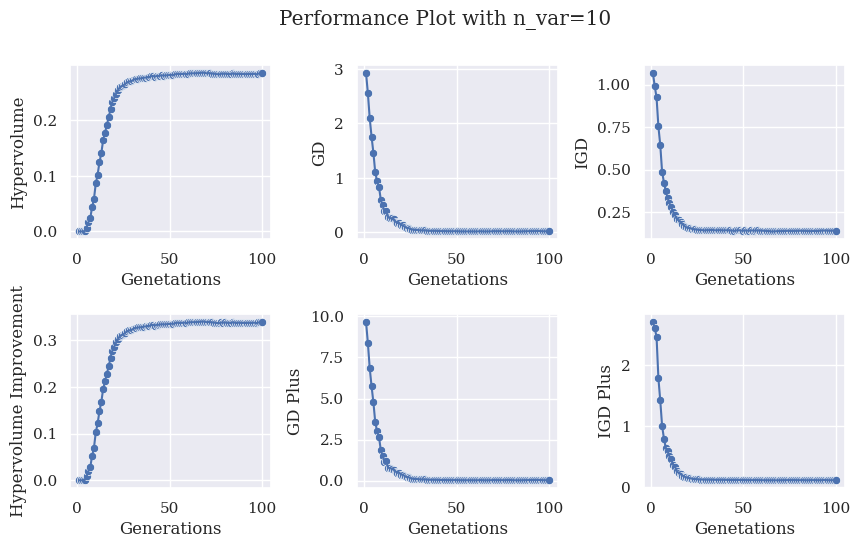

Max values of Hypervolume is 0.2854988410647872 
 , Best value of GD is 0.01427765195276901 
 , Best value of IGD is 
 0.13670164945706487 Best value of GD+ is 0.015396011762422234 , Best value of IGD+ is 0.10760949000476053


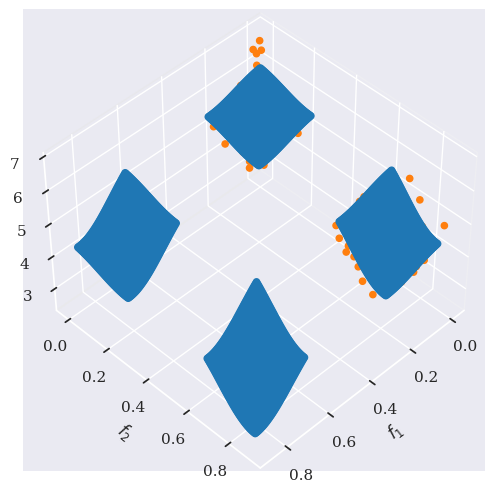

In [9]:
model_list = []
problem = DTLZ7(n_var =5)
algorithm = SPEA2(pop_size=100)
np.random.seed(10)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
plot = Scatter()
plot.add(original_pareto_front)
plot.add(model_list[0].F)
plot.show()
#plt.show()

#### SPEA2 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     16 |  2.1148208337 |  2.8076397458 |  0.000000E+00 |  9.2315600659 |  6.6242331415
     2 |      200 |     24 |  1.7881286291 |  2.6193366600 |  0.000000E+00 |  8.6657982944 |  5.6712642350
     3 |      300 |     20 |  1.4960704163 |  2.1312947098 |  0.000000E+00 |  6.8038980729 |  4.0675281565
     4 |      400 |     21 |  1.1951553286 |  1.8652903419 |  0.000000E+00 |  6.0061980433 |  3.4057057563
     5 |      500 |     20 |  1.0448965368 |  1.8310362902 |  0.000000E+00 |  6.1074943969 |  2.9177915150
     6 |      600 |     29 |  0.8505710598 |  1.3472315326 |  0.000000E+00 |  4.3975432007 |  2.2970893199
     7 |      700 |     20 |  0.8403688363 |  1.1556858988 |  0.000000E+00 |  3.7341696424 |  2.1325219652
     8 |      800 |     26 |  0.7501113263 |  1.0473285309 |  0.000000E+00 |  3.3827346448 |  1.5539989162
     9 |      900 |     33 |  0.56690

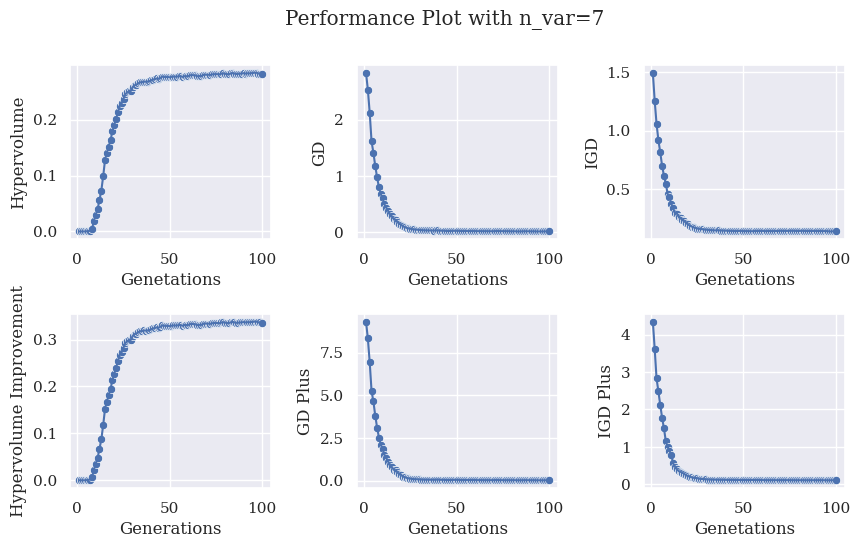

Max values of Hypervolume is 0.2838251740828239 
 , Best value of GD is 0.012979538312964006 
 , Best value of IGD is 
 0.13787690877234732 Best value of GD+ is 0.013283960140345788 , Best value of IGD+ is 0.10928223876983556


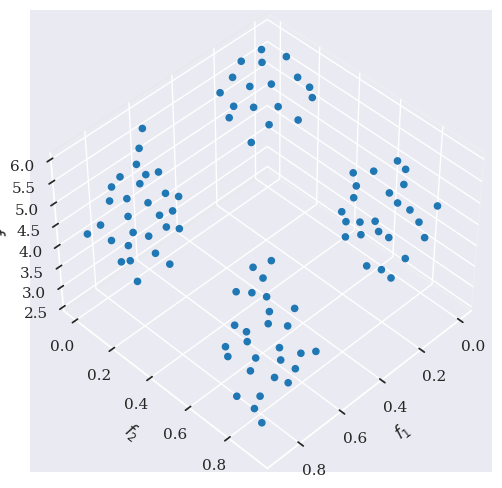

In [10]:
model_list = []
problem = DTLZ7(n_var =7)
algorithm = SPEA2(pop_size=100)
np.random.seed(11)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### SPEA2 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     17 |  1.5548220126 |  2.2292870627 |  0.000000E+00 |  7.2599366080 |  4.8632960470
     2 |      200 |     14 |  1.1667664227 |  2.5067292162 |  0.000000E+00 |  8.2977965853 |  3.3560356993
     3 |      300 |     20 |  0.8286171781 |  1.7955760186 |  0.000000E+00 |  5.8618520473 |  1.4215633656
     4 |      400 |     24 |  0.7217320682 |  1.2440045242 |  0.000000E+00 |  3.9627243046 |  1.4174722364
     5 |      500 |     24 |  0.6552347779 |  1.2155969428 |  0.000000E+00 |  3.8867552281 |  1.4165174776
     6 |      600 |     33 |  0.4867416851 |  0.9622476400 |  0.0016370365 |  3.0343579994 |  1.0287838917
     7 |      700 |     35 |  0.3611403914 |  0.8829431060 |  0.0230061961 |  2.8017918481 |  0.9392274653
     8 |      800 |     31 |  0.2776478859 |  0.9056040016 |  0.0382013980 |  2.9206474521 |  0.5538486632
     9 |      900 |     43 |  0.22674

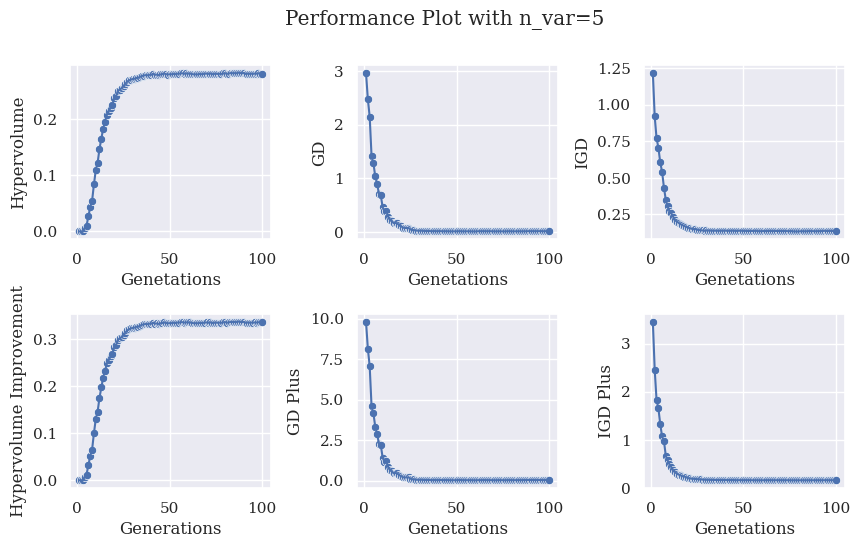

Max values of Hypervolume is 0.28285050599641187 
 , Best value of GD is 0.015105219542328907 
 , Best value of IGD is 
 0.13264856492447885 Best value of GD+ is 0.01699535854615834 , Best value of IGD+ is 0.15718340833173006


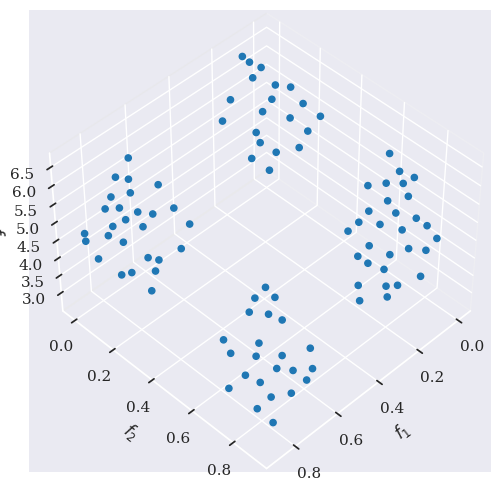

In [11]:
model_list = []
problem = DTLZ7(n_var =5)
algorithm = SPEA2(pop_size=100)
np.random.seed(12)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     23 |  0.9241850440 |  2.5333350007 |  0.000000E+00 |  8.2885746749 |  2.1358443318
     2 |      200 |     27 |  0.8944709728 |  2.1908732003 |  0.000000E+00 |  7.1486748485 |  1.9739335772
     3 |      300 |     22 |  0.6761238763 |  1.9743525769 |  0.0027830067 |  6.4191588790 |  1.2999564763
     4 |      400 |     28 |  0.6758944727 |  1.6503802618 |  0.0027830067 |  5.3236300010 |  1.2999564763
     5 |      500 |     23 |  0.4973103622 |  1.4873362850 |  0.0027830067 |  4.8196359988 |  1.2686569819
     6 |      600 |     21 |  0.4889884937 |  0.9299669925 |  0.0290235147 |  2.9776491342 |  0.8375842224
     7 |      700 |     33 |  0.4646549716 |  0.9576799078 |  0.0309785134 |  3.1105911377 |  0.8374993755
     8 |      800 |     37 |  0.4350420694 |  0.7049879942 |  0.0396194931 |  2.2488361907 |  0.8264585492
     9 |      900 |     46 |  0.30712

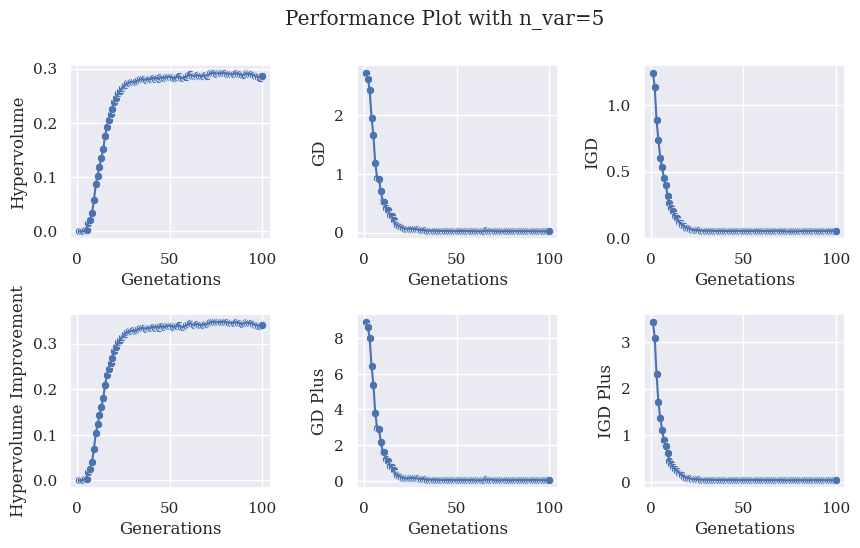

Max values of Hypervolume is 0.29240269584702416 
 , Best value of GD is 0.02017582985676504 
 , Best value of IGD is 
 0.04914149262415644 Best value of GD+ is 0.029425920539305678 , Best value of IGD+ is 0.036491624419277106


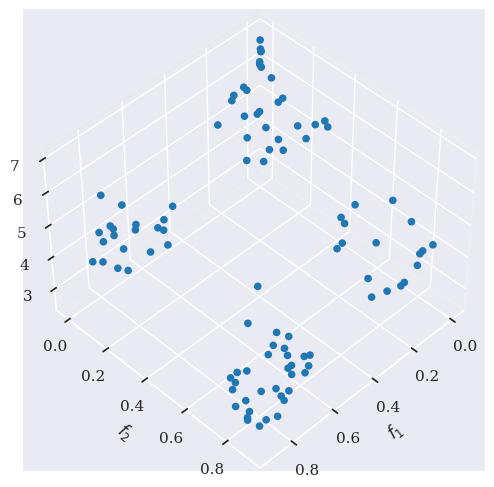

In [12]:
model_list = []
problem = DTLZ7(n_var =5)
algorithm = NSGA2(pop_size=100)
np.random.seed(13)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     16 |  1.9127044891 |  3.0970280682 |  0.000000E+00 |  1.030135E+01 |  6.1099614601
     2 |      200 |     27 |  1.5751300284 |  2.7276452995 |  0.000000E+00 |  9.0462955919 |  4.9961319147
     3 |      300 |     17 |  1.1949928370 |  2.3805333542 |  0.000000E+00 |  7.7968206599 |  3.1349521023
     4 |      400 |     20 |  1.0673016845 |  2.4061530787 |  0.000000E+00 |  7.9526731745 |  3.1172010220
     5 |      500 |     24 |  0.6252747064 |  1.4688700991 |  0.0038909077 |  4.7473285064 |  0.9215100197
     6 |      600 |     23 |  0.5172302658 |  1.2166336852 |  0.0041882009 |  3.9275112120 |  0.7453276736
     7 |      700 |     28 |  0.4106819851 |  1.0873785999 |  0.0055234096 |  3.5460412713 |  0.5904807900
     8 |      800 |     37 |  0.2558292158 |  0.8400339085 |  0.0239521998 |  2.6547557178 |  0.4446935793
     9 |      900 |     41 |  0.20891

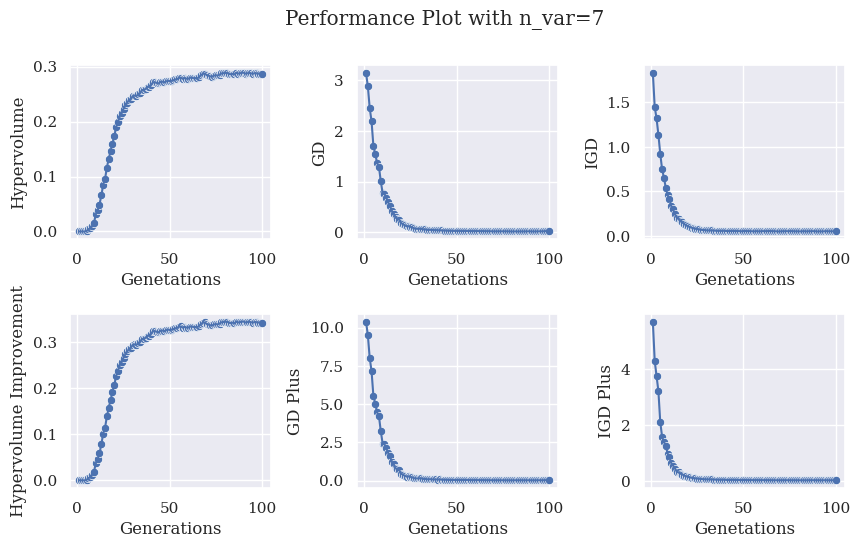

Max values of Hypervolume is 0.2889940644943012 
 , Best value of GD is 0.01634252691251494 
 , Best value of IGD is 
 0.04969565212566579 Best value of GD+ is 0.016761589689409873 , Best value of IGD+ is 0.03884959418610742


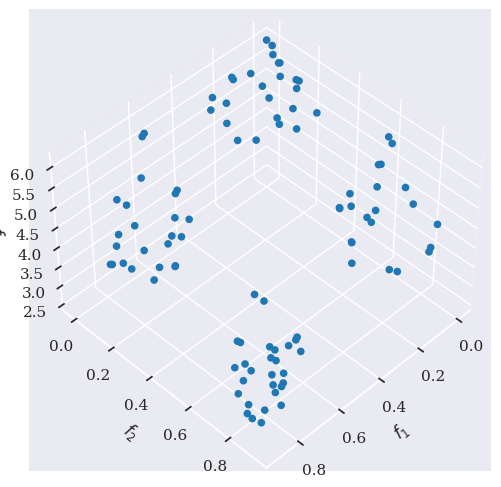

In [13]:
model_list = []
problem = DTLZ7(n_var =7)
algorithm = NSGA2(pop_size=100)
np.random.seed(14)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     13 |  1.9602241734 |  3.1499138494 |  0.000000E+00 |  1.050736E+01 |  6.2622005347
     2 |      200 |     20 |  1.9192825062 |  2.9809952625 |  0.000000E+00 |  1.001786E+01 |  6.1127055528
     3 |      300 |     28 |  1.8220963554 |  2.5538890453 |  0.000000E+00 |  8.5216058929 |  5.9046739843
     4 |      400 |     29 |  1.4255553963 |  2.4909449730 |  0.000000E+00 |  8.3036565468 |  3.8838696947
     5 |      500 |     25 |  1.2608991485 |  2.2439039612 |  0.000000E+00 |  7.4779934187 |  3.8838696947
     6 |      600 |     26 |  1.2235265840 |  2.0804658243 |  0.000000E+00 |  6.9578005223 |  3.4833110461
     7 |      700 |     31 |  1.1033308567 |  1.8438839002 |  0.000000E+00 |  6.1687128739 |  3.4833110461
     8 |      800 |     36 |  0.8130656402 |  1.6186008126 |  0.000000E+00 |  5.4042160252 |  1.7115199676
     9 |      900 |     37 |  0.66872

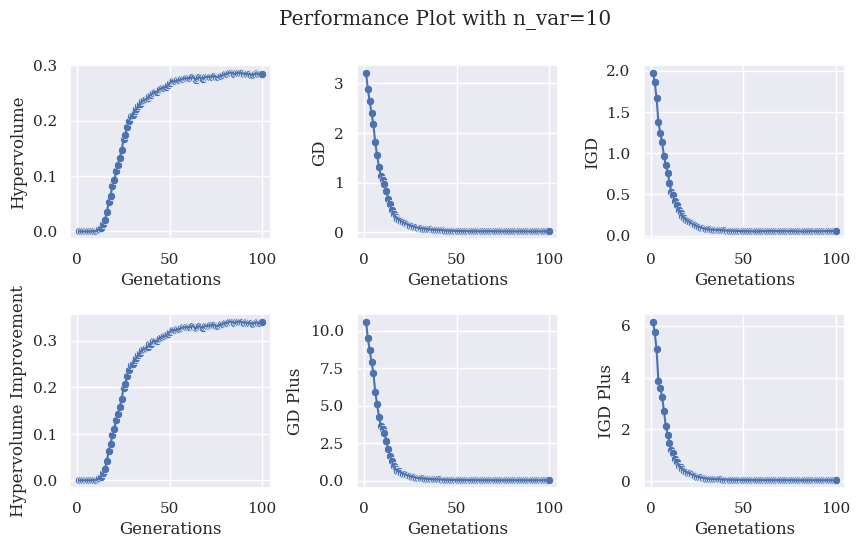

Max values of Hypervolume is 0.28619289481972066 
 , Best value of GD is 0.018618688697427242 
 , Best value of IGD is 
 0.04961460224396928 Best value of GD+ is 0.018901280328356723 , Best value of IGD+ is 0.041049671745906915


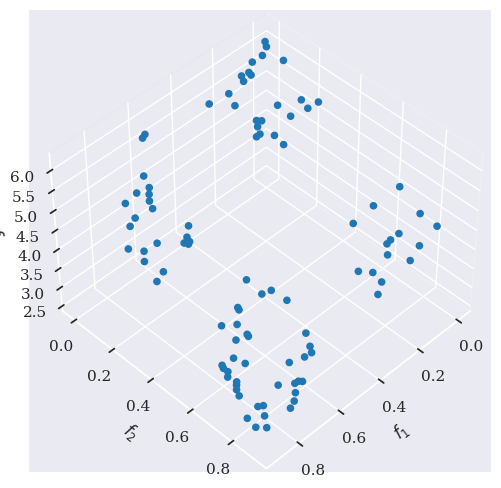

In [14]:
model_list = []
problem = DTLZ7(n_var =10)
algorithm = NSGA2(pop_size=100)
np.random.seed(15)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

In [15]:
from pymoo.util.ref_dirs import get_reference_directions
ref_dirs = get_reference_directions('energy',3,100,seed=1)

#### MOEAD with nvar5

In [16]:
from pymoo.algorithms.moo.moead import MOEAD

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     11 |  1.0452490026 |  2.0253297897 |  0.000000E+00 |  6.5686073759 |  2.3453919488
     2 |      200 |     51 |  0.6256913768 |  0.0557213485 |  0.0210102692 |  0.1031415321 |  0.5827617783
     3 |      300 |     90 |  0.5563094589 |  0.0166402496 |  0.0365357568 |  0.0184700497 |  0.4940337751
     4 |      400 |     64 |  0.4530219032 |  0.0535091543 |  0.0524470896 |  0.0502188471 |  0.4439335129
     5 |      500 |     80 |  0.4240256045 |  0.0453084795 |  0.0561612905 |  0.0411753094 |  0.4212982902
     6 |      600 |     86 |  0.3946379737 |  0.0444209910 |  0.0639229447 |  0.0350718512 |  0.3783388156
     7 |      700 |     87 |  0.3552065954 |  0.0323382415 |  0.0750444263 |  0.0218085920 |  0.3336354701
     8 |      800 |     77 |  0.3018263945 |  0.0495208106 |  0.0970756457 |  0.0284795075 |  0.2728645952
     9 |      900 |     83 |  0.27067

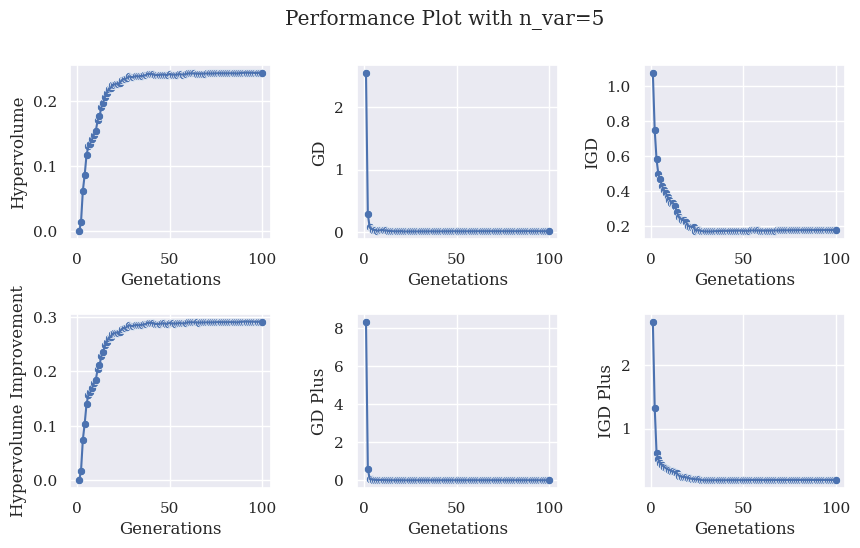

Max values of Hypervolume is 0.24429097247605563 
 , Best value of GD is 0.01065048934263461 
 , Best value of IGD is 
 0.17012148050848075 Best value of GD+ is 0.00821096140206143 , Best value of IGD+ is 0.1809455589602314


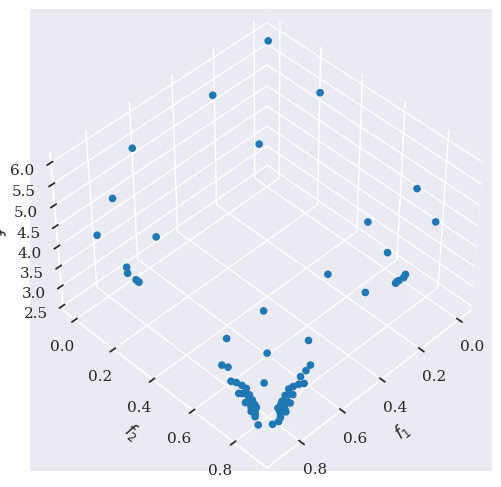

In [17]:
model_list = []
problem = DTLZ7(n_var =5)
algorithm = MOEAD(ref_dirs = ref_dirs)
np.random.seed(16)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### MOEAD with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     17 |  1.0587626643 |  3.1514596262 |  0.000000E+00 |  1.033534E+01 |  1.9994111492
     2 |      200 |     38 |  0.7114533469 |  0.2447600059 |  0.0012733932 |  0.3335792966 |  0.8052943664
     3 |      300 |     74 |  0.5889577252 |  0.1154365472 |  0.0490080276 |  0.1290298983 |  0.6125400937
     4 |      400 |     60 |  0.5414982656 |  0.0550687945 |  0.0747685366 |  0.0469802421 |  0.4616105776
     5 |      500 |     54 |  0.5335312159 |  0.0509531360 |  0.0810800102 |  0.0379558291 |  0.4600129623
     6 |      600 |     65 |  0.5287343547 |  0.0466679119 |  0.0857635013 |  0.0344252139 |  0.4501819421
     7 |      700 |     64 |  0.5239478006 |  0.0545116570 |  0.0898508889 |  0.0451300585 |  0.4455400798
     8 |      800 |     49 |  0.5221678515 |  0.0405007502 |  0.0917755123 |  0.0392701797 |  0.4395020817
     9 |      900 |     55 |  0.51990

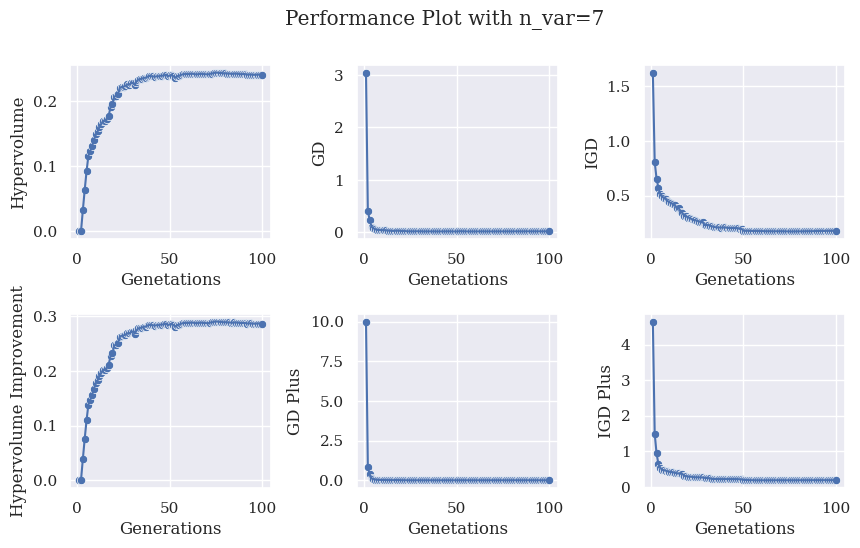

Max values of Hypervolume is 0.24382201649240845 
 , Best value of GD is 0.011762792442044648 
 , Best value of IGD is 
 0.17176448256145338 Best value of GD+ is 0.008479505754723332 , Best value of IGD+ is 0.18398679941056673


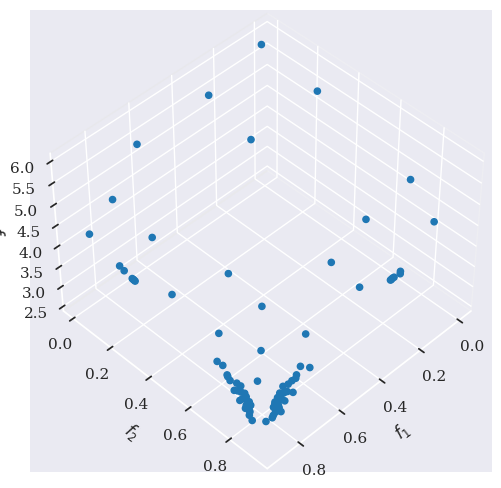

In [18]:
model_list = []
problem = DTLZ7(n_var =7)
algorithm = MOEAD(ref_dirs = ref_dirs)
np.random.seed(17)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### MOEAD with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     16 |  1.9523153586 |  2.9264612032 |  0.000000E+00 |  9.6374597823 |  6.0091356644
     2 |      200 |     55 |  0.7602329816 |  0.3791594070 |  0.0058562030 |  0.8237983462 |  1.2103277075
     3 |      300 |     44 |  0.5971154932 |  0.2574743891 |  0.0104068223 |  0.4823386648 |  0.9957789157
     4 |      400 |     41 |  0.5446434475 |  0.1606581475 |  0.0312799447 |  0.2445635563 |  0.8043712717
     5 |      500 |     67 |  0.4617462656 |  0.1387329064 |  0.0390974147 |  0.1798414927 |  0.6230408630
     6 |      600 |     45 |  0.3866715295 |  0.0737519979 |  0.1021095495 |  0.0835692733 |  0.4222358794
     7 |      700 |     52 |  0.3599860216 |  0.0504294712 |  0.1685498407 |  0.0536148444 |  0.3548870544
     8 |      800 |     65 |  0.3462142551 |  0.0298877819 |  0.1838051054 |  0.0274489549 |  0.3161889368
     9 |      900 |     47 |  0.34438

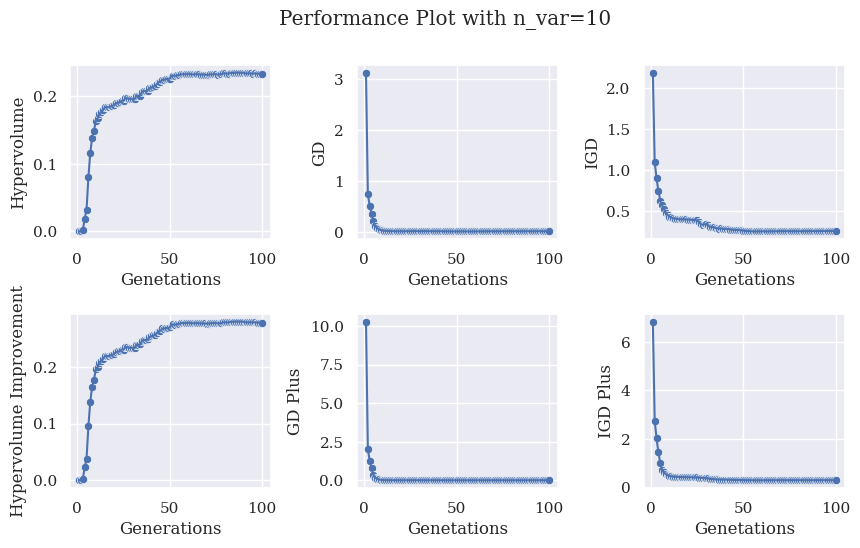

Max values of Hypervolume is 0.2349549599136104 
 , Best value of GD is 0.009573715000326114 
 , Best value of IGD is 
 0.2560610205518879 Best value of GD+ is 0.00788168967585261 , Best value of IGD+ is 0.30067656890244876


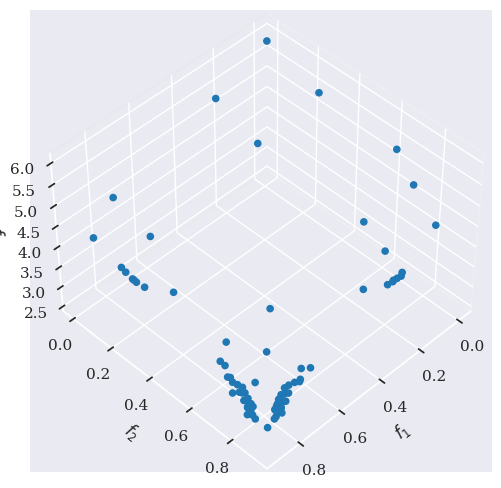

In [19]:
model_list = []
problem = DTLZ7(n_var =10)
algorithm = MOEAD(ref_dirs = ref_dirs)
np.random.seed(18)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     11 |  0.9257356012 |  2.7486006366 |  0.000000E+00 |  8.9797379056 |  2.5729660294
     2 |      200 |     13 |  0.6727122558 |  2.6638753960 |  0.0030816348 |  8.7886130470 |  1.3914151138
     3 |      300 |     17 |  0.6797756750 |  2.4836365914 |  0.000000E+00 |  8.2293676631 |  1.4294028807
     4 |      400 |     16 |  0.7412915576 |  1.8273851076 |  0.000000E+00 |  6.0602652162 |  1.8835713835
     5 |      500 |     24 |  0.5661182954 |  1.2353224427 |  0.0045307868 |  3.9867612460 |  1.3333028448
     6 |      600 |      5 |  0.5647636921 |  0.1970118990 |  0.0166474865 |  0.4295530614 |  1.2907490010
     7 |      700 |     11 |  0.5517959706 |  0.1768045628 |  0.0203041348 |  0.3927244969 |  1.2825115929
     8 |      800 |     14 |  0.3513204999 |  0.2944026112 |  0.0791478752 |  0.7652249170 |  0.6622239670
     9 |      900 |     19 |  0.33425

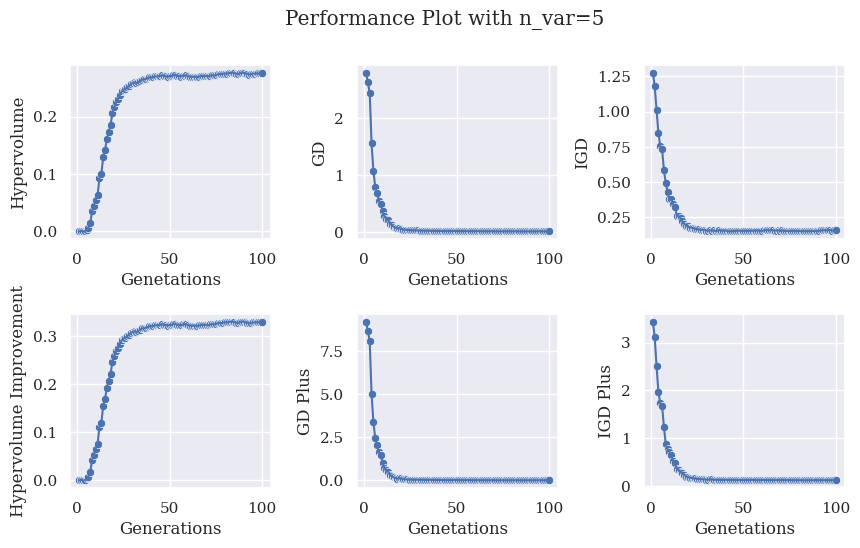

Max values of Hypervolume is 0.2763952779738402 
 , Best value of GD is 0.007986381245619397 
 , Best value of IGD is 
 0.1486027885387909 Best value of GD+ is 0.006221528830758945 , Best value of IGD+ is 0.11656535049140104


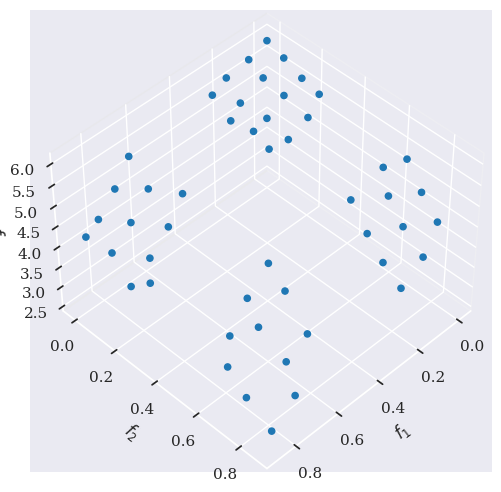

In [20]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ7(n_var =5)
np.random.seed(19)
algorithm = NSGA3(ref_dirs = ref_dirs)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     15 |  1.7392217965 |  3.1814224511 |  0.000000E+00 |  1.052018E+01 |  5.3262971514
     2 |      200 |      5 |  1.4103216101 |  2.7833581195 |  0.000000E+00 |  9.2648597112 |  4.0047737241
     3 |      300 |     11 |  1.0839087022 |  2.4496145525 |  0.000000E+00 |  8.0405125091 |  3.1401739331
     4 |      400 |     10 |  1.0695049070 |  1.7691634430 |  0.000000E+00 |  5.7478900099 |  3.1401739331
     5 |      500 |     11 |  1.0546580110 |  1.6322454571 |  0.000000E+00 |  5.2345947826 |  3.1401739331
     6 |      600 |     15 |  0.7958413937 |  1.7766213838 |  0.0063601948 |  5.8516099314 |  1.3874045406
     7 |      700 |     15 |  0.7205033969 |  1.1071276513 |  0.0128468176 |  3.6140762576 |  1.2745359167
     8 |      800 |     11 |  0.6075350716 |  1.0307507043 |  0.0130262203 |  3.3324789255 |  1.2745255260
     9 |      900 |     14 |  0.49265

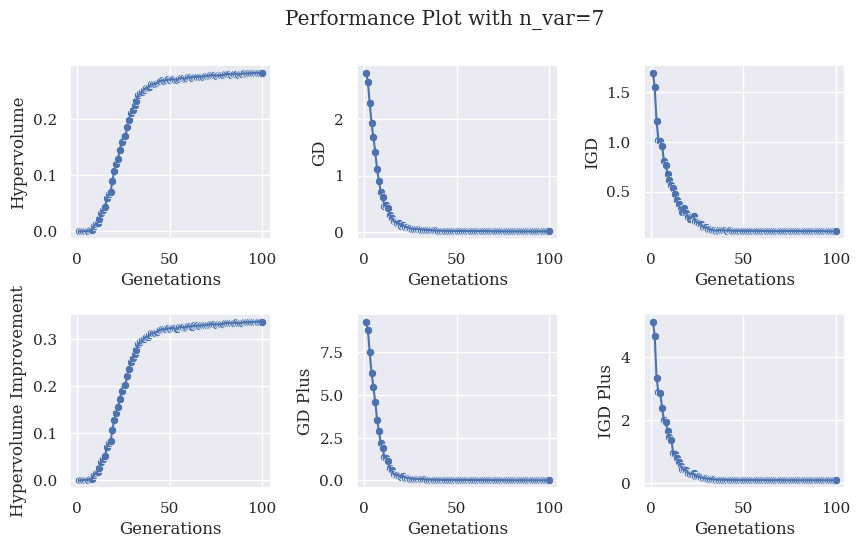

Max values of Hypervolume is 0.28343943193805987 
 , Best value of GD is 0.009558937434841671 
 , Best value of IGD is 
 0.10024009215617118 Best value of GD+ is 0.008604236394483761 , Best value of IGD+ is 0.0794365639884117


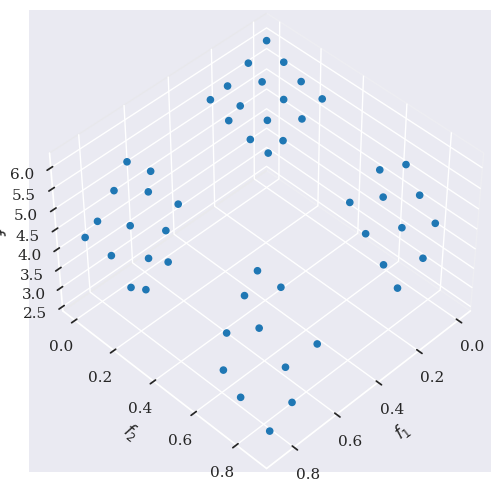

In [21]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ7(n_var =7)
algorithm = NSGA3(ref_dirs = ref_dirs)
np.random.seed(20)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     11 |  2.5172113183 |  3.2434822338 |  0.000000E+00 |  1.089571E+01 |  8.2268849440
     2 |      200 |     11 |  2.0083422523 |  2.7401468388 |  0.000000E+00 |  9.0522675696 |  6.2532778058
     3 |      300 |     14 |  1.7433539434 |  2.6980408392 |  0.000000E+00 |  8.9490265258 |  5.4366274037
     4 |      400 |      8 |  1.7818462065 |  2.3740163952 |  0.000000E+00 |  7.9201534241 |  5.4768058564
     5 |      500 |      7 |  1.4523733255 |  1.7942626069 |  0.000000E+00 |  5.9272937485 |  4.2580782970
     6 |      600 |     12 |  1.2778397744 |  1.5963433893 |  0.000000E+00 |  5.1107548572 |  3.8163450342
     7 |      700 |     10 |  1.1001574576 |  1.2279432131 |  0.000000E+00 |  3.9925660387 |  3.0722694653
     8 |      800 |      7 |  1.0333405552 |  1.0367858662 |  0.000000E+00 |  3.1674451443 |  3.0722694653
     9 |      900 |      7 |  0.90944

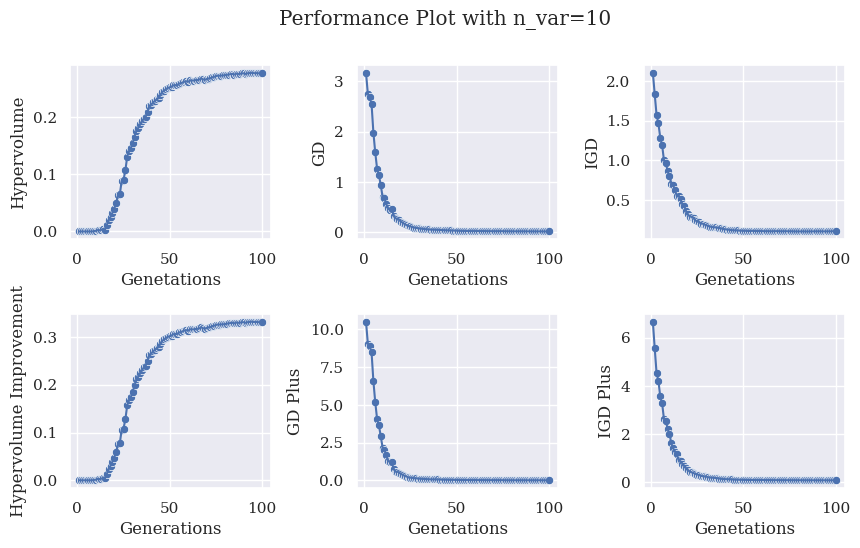

Max values of Hypervolume is 0.2785212610069429 
 , Best value of GD is 0.009751510923602092 
 , Best value of IGD is 
 0.10255123450460144 Best value of GD+ is 0.011008702815319233 , Best value of IGD+ is 0.08233476532981698


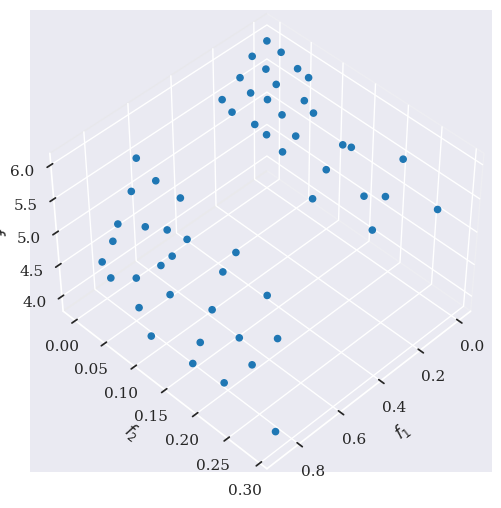

In [22]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ7(n_var =10)
algorithm = NSGA3(ref_dirs = ref_dirs)
np.random.seed(21)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()